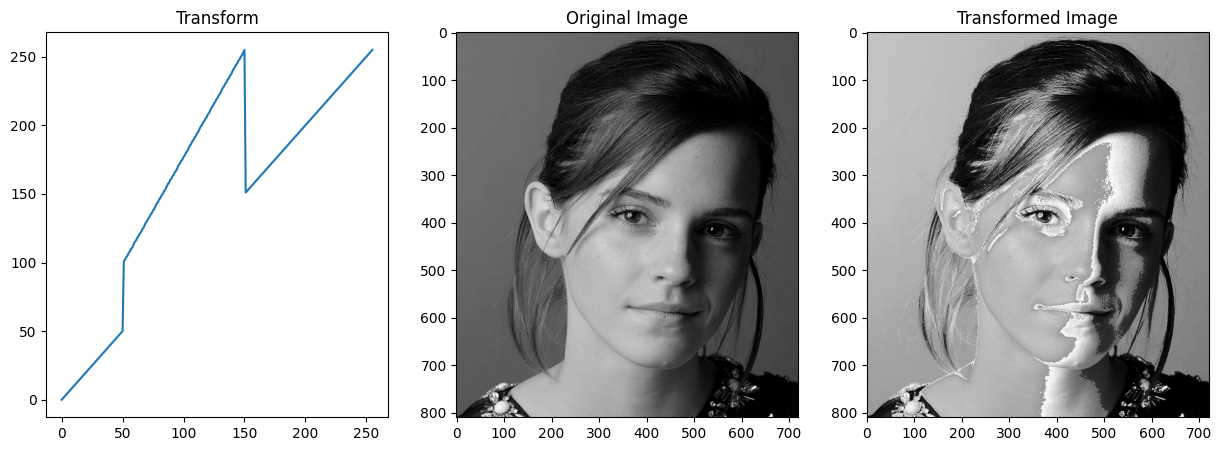

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(50, 50), (50, 100), (150, 255), (150, 150), (255, 255)])

t1 = np.linspace(0          , c[0, 1], c[0, 0] + 1 - 0).astype(np.uint8)
t2 = np.linspace(c[0, 1] + 1, c[1, 1], c[1, 0] - c[0, 0]).astype(np.uint8)
t3 = np.linspace(c[1, 1] + 1, c[2, 1], c[2, 0] - c[1, 0]).astype(np.uint8)
t4 = np.linspace(c[2, 1] + 1, c[3, 1], c[3, 0] - c[2, 0]).astype(np.uint8)
t5 = np.linspace(c[3, 1] + 1, 255    , 255 - c[3, 0]).astype(np.uint8)

transform = np.concatenate((t1, t2), axis=0).astype(np.uint8)
transform = np.concatenate((transform, t3), axis=0).astype(np.uint8)
transform = np.concatenate((transform, t4), axis=0).astype(np.uint8)
transform = np.concatenate((transform, t5), axis=0).astype(np.uint8)

original_image = cv2.imread('images/emma.jpg', cv2.IMREAD_GRAYSCALE)
transformed_image = cv2.LUT(original_image, transform)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(transform)
ax[0].set_title('Transform')
ax[1].imshow(original_image, cmap='gray')
ax[1].set_title('Original Image')
ax[2].imshow(transformed_image, cmap='gray')
ax[2].set_title('Transformed Image')
plt.show()


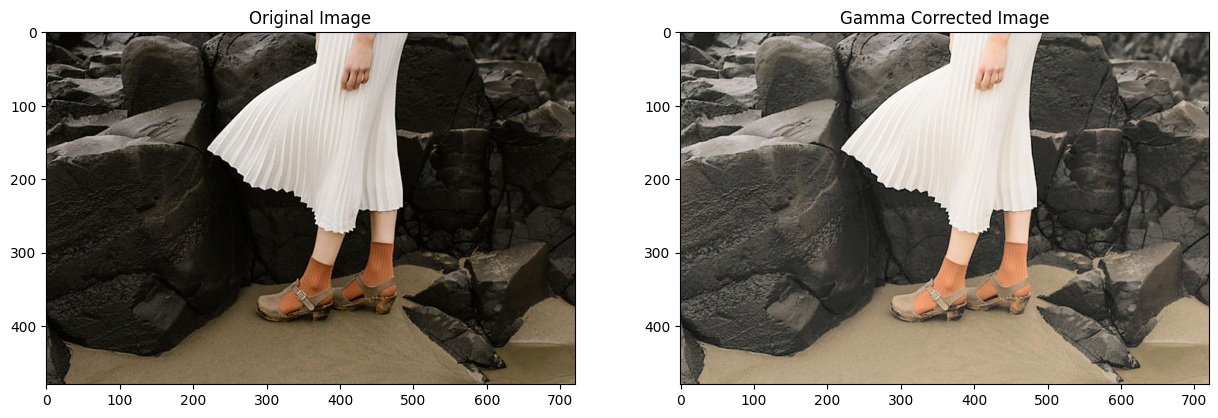

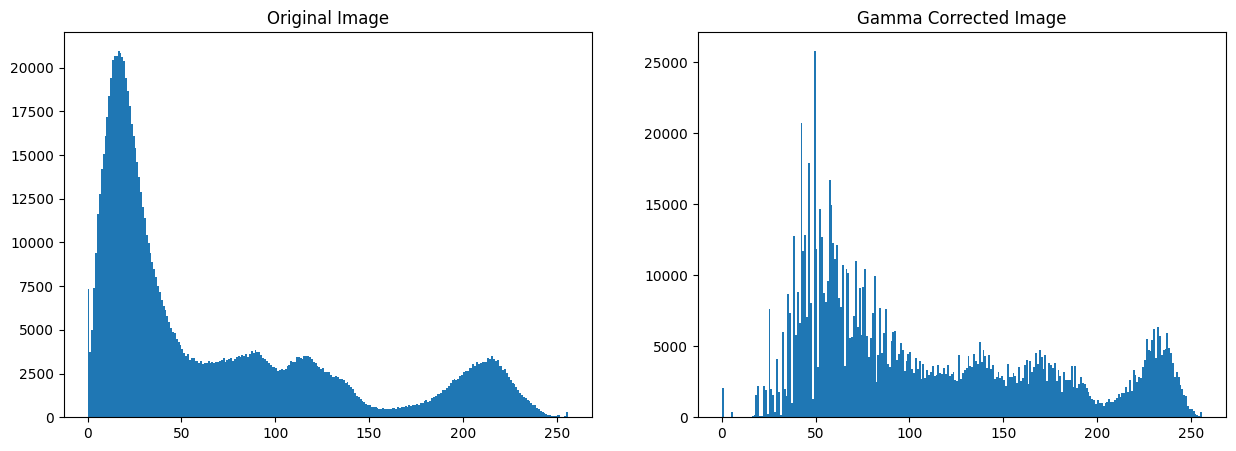

In [51]:
image = cv2.imread('images/highlights_and_shadows.jpg')
assert image is not None
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

lab_image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
L, a, b = cv2.split(lab_image)

gamma = 0.5
transform = np.array([(i/255.0)**(gamma)*255 for i in np.arange(0, 256)]).astype(np.uint8)

L = cv2.LUT(L, transform)

lab_image = cv2.merge((L, a, b))
new_image = cv2.cvtColor(lab_image, cv2.COLOR_LAB2RGB)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[1].imshow(new_image)
ax[1].set_title('Gamma Corrected Image')
plt.show()

# Histograms of the original and corrected images
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(image.ravel(), 256, [0, 256])
ax[0].set_title('Original Image')
ax[1].hist(new_image.ravel(), 256, [0, 256])
ax[1].set_title('Gamma Corrected Image')
plt.show()
